In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import scipy

# First the Decision Tree

## Get the Data

Sklearn.datasets has some sample data sets

In [23]:
Data = load_breast_cancer()
X = Data.data 
y = Data.target

In [28]:
Data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### Split it into Train and Test Data

In [24]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.5,
                                                    random_state = 42)

## Train a Tree

- We use here the max_depth = 2 (only two splits of the tree) and criterion="gini" instead of criterion="entropy"
- Only train it on the training data
- and we will visualise the tree

In [4]:
tree_clf = DecisionTreeClassifier(criterion="gini",max_depth=2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [5]:
Data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

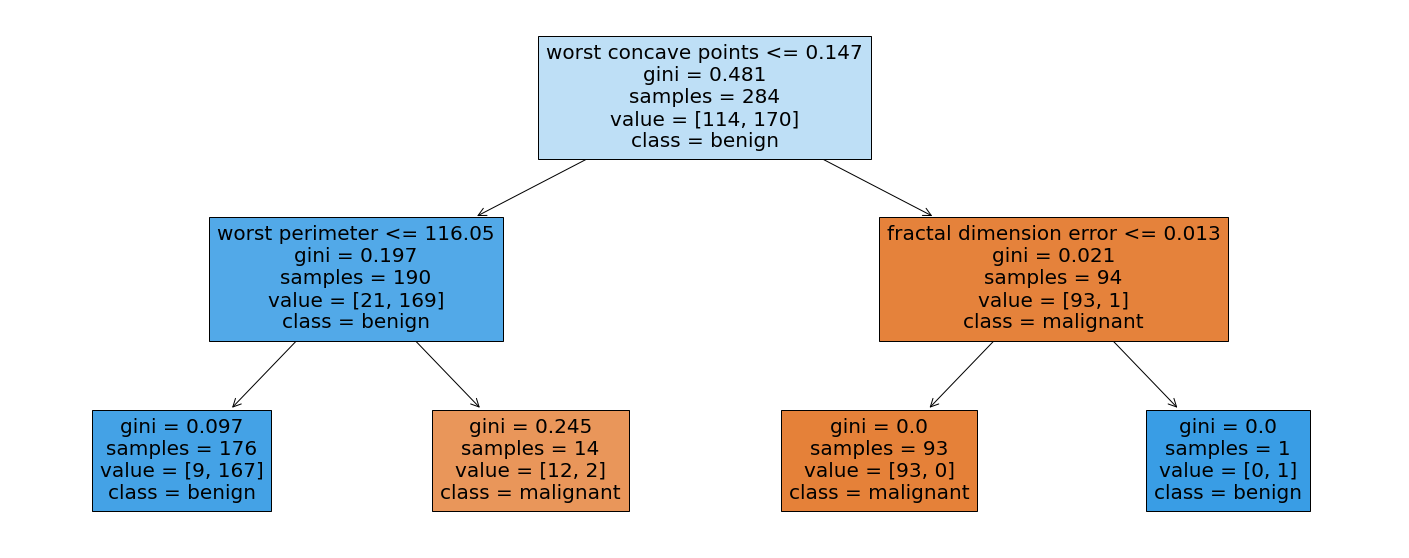

In [6]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(tree_clf, 
                   feature_names=Data.feature_names,  
                   class_names=Data.target_names,
                   filled=True)

### We can also restrict the plotting range
via a max_depth parameter

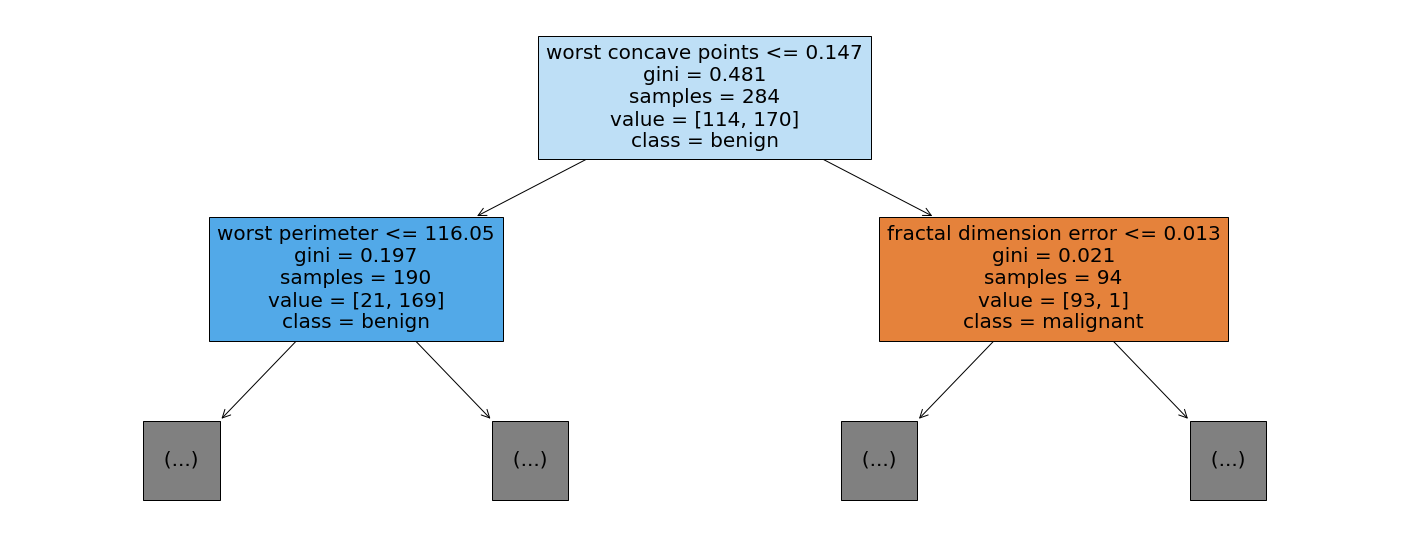

In [7]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(tree_clf,
                   max_depth = 1,
                   feature_names=Data.feature_names,  
                   class_names=Data.target_names,
                   filled=True)

# Evaluating it on the Test Data

We predict y_pred with the tree model and compare it to y_test. But of course, we need to define a couple of metrics to evaluate the prediction quality.

In [8]:
y_pred = tree_clf.predict(X_test)
print(y_pred)

[1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1]


Because of the binary nature of our problem, the predictions are zeros or ones.

In [9]:
def Accuracy(Prediction, Truth):
    
    LogicalArray = (Prediction == Truth)
    
    
    return( np.mean(LogicalArray) ) # we can use mean, because numpy treats True as 1 and False as 0


def Precision(Prediction, Truth):
    
    PositivePredictions = Prediction[Prediction==1] # only select the positive predictions
    PositiveTruths = Truth[Prediction==1] # only select the positive predictions

    TruePositivePredictions =  sum(PositiveTruths) # how many true 1s are there 
    AllPredictedPositives = sum(PositivePredictions) # only consider the true 1s
    return(TruePositivePredictions/AllPredictedPositives)




def Recall(Prediction, Truth):
    
    PositivePredictions = Prediction[Truth==1] # only select the truly positive labels
    PositiveTruths = Truth[Truth==1] # only select the truly positive labels

    TruePositivePredictions = sum(PositivePredictions)  # how many correctly predicted 1s
    AllTruePositives = sum(PositiveTruths) # how many true 1s are there 
    
    return(TruePositivePredictions/AllTruePositives)

In [10]:
print("The Accuracy is", Accuracy(y_pred,y_test))
print("The Precision is", Precision(y_pred,y_test))
print("The Recall is", Recall(y_pred,y_test))

The Accuracy is 0.9403508771929825
The Precision is 0.9473684210526315
The Recall is 0.9625668449197861


## Regression Tree

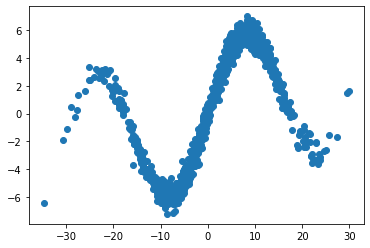

In [11]:
# First define some data

def f(x):
    return(5*np.sin(0.2*x) + 0.1*x)


N = 1000
X = np.random.normal(0,10,N)
y = f(X) + np.random.normal(0,0.5,N)

X_train, X_test, y_train, y_test  = train_test_split(X.reshape(-1, 1),  # .reshape(-1, 1) is sometimes necessary
                                                     y.reshape(-1, 1),  # for sklearn to understand that these
                                                     test_size = 0.5,   # are 1-dimensional arrays with N instances 
                                                     random_state = 42) # and not one instance with N features

plt.scatter(X,y)
plt.show()

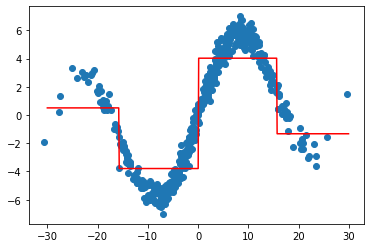

In [12]:
RegTree =  DecisionTreeRegressor(criterion='squared_error',  # which evaluation criterion?
                                  max_depth=2)  # How many splits of the tree?

RegTree.fit(X_train, y_train)

# Predict this on a uniform range of parameters
PredictionRange = np.arange(-30,30,0.1).reshape(-1,1)
y_hat = RegTree.predict(PredictionRange)

plt.scatter(X_test, y_test)
plt.plot(PredictionRange, y_hat,c="red")
plt.show()

### Now with a higher depth

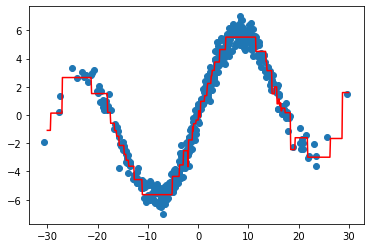

In [13]:
RegTree =  DecisionTreeRegressor(criterion='squared_error',  # which evaluation criterion?
                                  max_depth=6)  # How many splits of the tree?

RegTree.fit(X_train, y_train)

# Predict this on a uniform range of parameters
PredictionRange = np.arange(-30,30,0.1).reshape(-1,1)
y_hat = RegTree.predict(PredictionRange)

plt.scatter(X_test, y_test)
plt.plot(PredictionRange, y_hat,c="red")
plt.show()

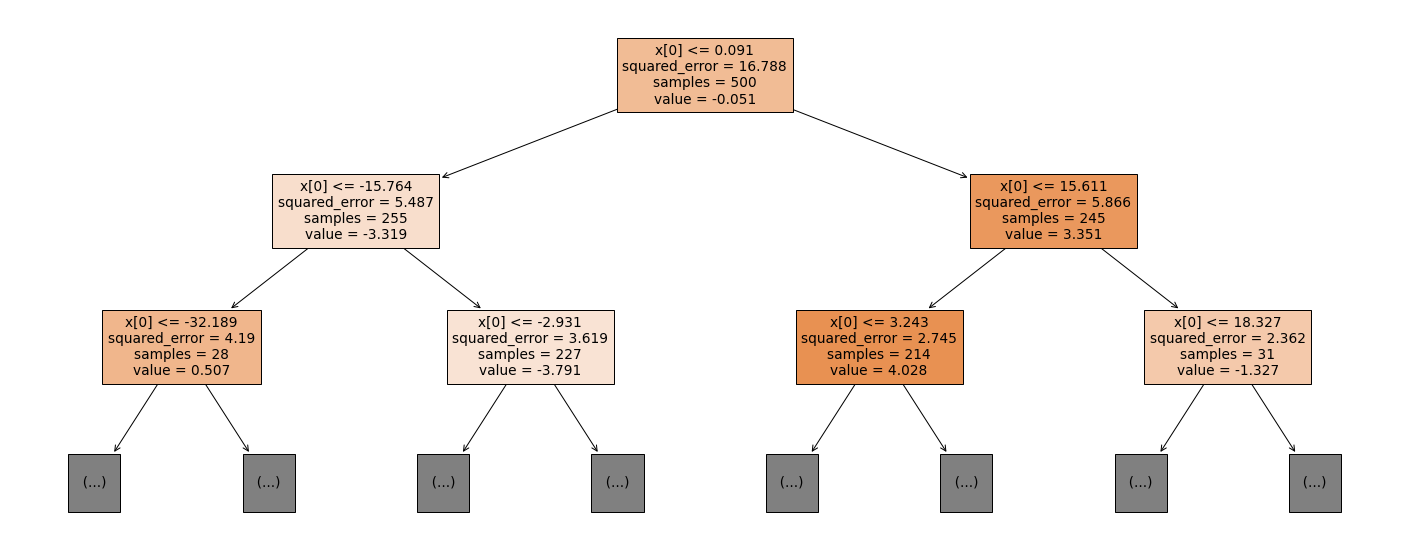

In [14]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(RegTree,
                   max_depth = 2,
                   filled=True)

# Now the Polynomial Regression

First, we define the PolyRed function and showcase a bit, what it can do:

In [15]:
class PolyReg:
    def __init__(self,N,x,y, Lambda=0):
        assert len(x)==len(y)
        self.order = N
        self.x = x
        self.y = y
        self.Lambda = Lambda
         
    def predict_for_fit(self, alpha):
        assert len(alpha) == (self.order+1)
        self.output = 0
        for i in range(self.order+1):
            self.output += alpha[i] * self.x**i
        return(self.output)
    
    def prediction_error(self,alpha):
        self.error = sum((self.predict_for_fit( alpha)-self.y)**2.) + sum(alpha**2.0)*self.Lambda
        return(self.error)
    
    def fit(self):
        
        self.coeffs = scipy.optimize.fmin(self.prediction_error, x0 = np.ones(self.order+1))
        
    def predict(self, X):
        self.prediction = np.ones(len(X))
        for i in range(self.order+1):
            self.prediction += self.coeffs[i] * X**i
        return(self.prediction)
    


### generate data

some sample polynomial data with noise


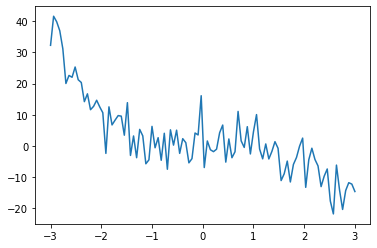

In [16]:
x = np.linspace(-3,3,100)
y = x**2. - x**3 + np.random.normal(0,5,len(x))
plt.plot(x,y)
plt.show()

Optimization terminated successfully.
         Current function value: 2559.107885
         Iterations: 246
         Function evaluations: 412


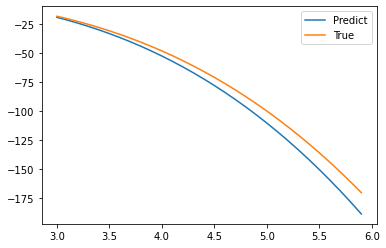

In [17]:
# initiate a polynomial of order 3 for the data
Poly3 = PolyReg(3,x,y)

# fit the polynomial
Poly3.fit()

# predict some new data and compare it to true values
x_new = np.arange(3,6,0.1)
plt.plot(x_new,Poly3.predict(x_new), label="Predict")
plt.plot(x_new, x_new**2 - x_new**3, label="True")
plt.legend()
plt.show()

## Now some Real Machine Learning

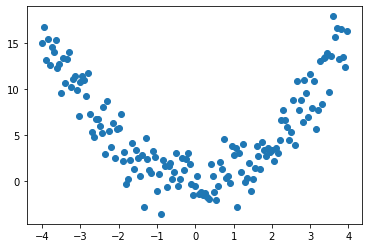

In [18]:
X = np.arange(-4.0,4.0,0.05)
#y = 2.0 + 5*X - 0.4*X**3. + np.random.normal(0,1,len(X))
y = X**2. + np.random.normal(0,2,len(X))
plt.scatter(X,y)
plt.show()

In [19]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.5,
                                                    random_state = 42)


Lasso penalty is 0.0
Optimization terminated successfully.
         Current function value: 598.315947
         Iterations: 669
         Function evaluations: 1064
[ 2.288  2.236  0.576 -0.496  0.024  0.024]


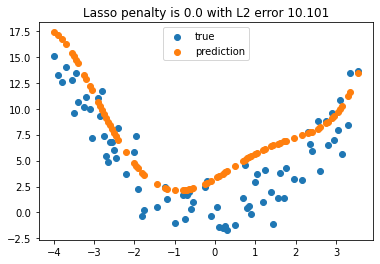

 ########### 
Lasso penalty is 0.05
Optimization terminated successfully.
         Current function value: 606.354794
         Iterations: 424
         Function evaluations: 684
[ 2.634  1.942  0.437 -0.416  0.033  0.019]


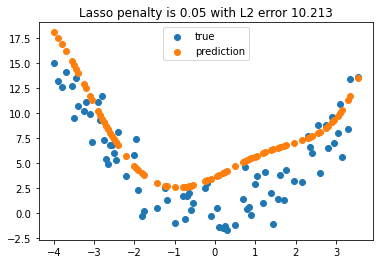

 ########### 
Lasso penalty is 0.1
[ 1.661  2.508  0.786 -0.574  0.012  0.028]


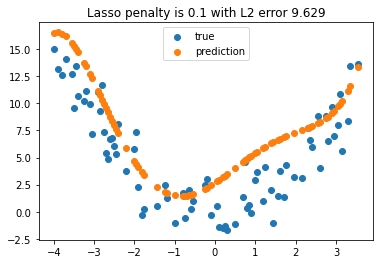

 ########### 
Lasso penalty is 0.15000000000000002
Optimization terminated successfully.
         Current function value: 602.853410
         Iterations: 678
         Function evaluations: 1074
[ 2.285  2.271  0.557 -0.501  0.026  0.024]


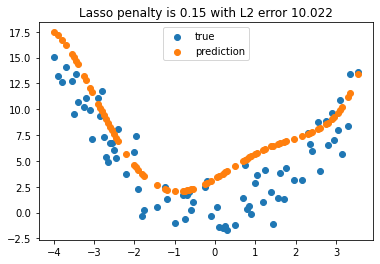

 ########### 
Lasso penalty is 0.2
Optimization terminated successfully.
         Current function value: 608.180873
         Iterations: 425
         Function evaluations: 697
[ 2.721  1.835  0.4   -0.388  0.035  0.018]


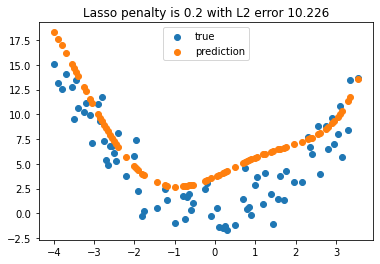

 ########### 
Lasso penalty is 0.25
Optimization terminated successfully.
         Current function value: 608.982636
         Iterations: 418
         Function evaluations: 677
[ 2.657  1.919  0.426 -0.409  0.033  0.019]


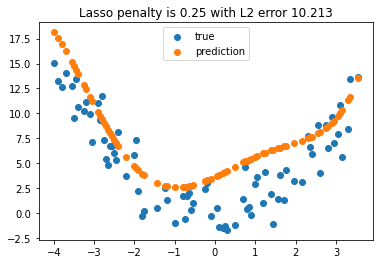

 ########### 
Lasso penalty is 0.30000000000000004
Optimization terminated successfully.
         Current function value: 599.533286
         Iterations: 681
         Function evaluations: 1081
[ 2.19   2.309  0.605 -0.514  0.023  0.024]


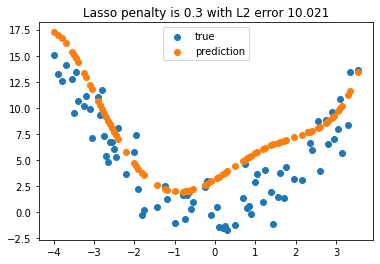

 ########### 
Lasso penalty is 0.35000000000000003
Optimization terminated successfully.
         Current function value: 602.205917
         Iterations: 690
         Function evaluations: 1085
[ 2.284  2.24   0.577 -0.496  0.024  0.024]


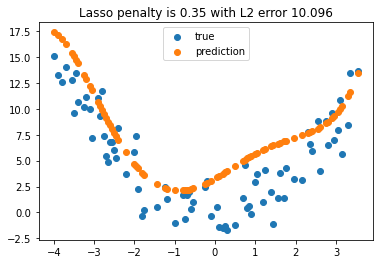

 ########### 
Lasso penalty is 0.4
Optimization terminated successfully.
         Current function value: 603.987202
         Iterations: 459
         Function evaluations: 738
[ 2.488  2.037  0.523 -0.446  0.027  0.021]


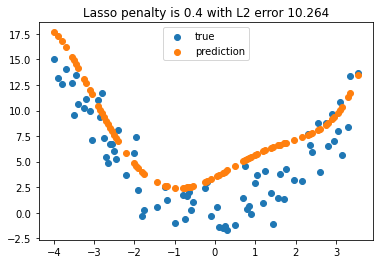

 ########### 
Lasso penalty is 0.45
Optimization terminated successfully.
         Current function value: 602.308526
         Iterations: 662
         Function evaluations: 1055
[ 2.216  2.296  0.594 -0.51   0.023  0.024]


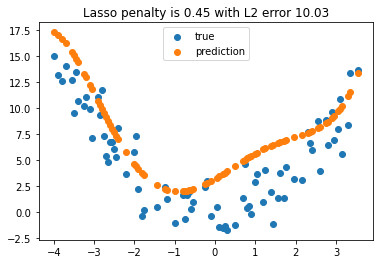

 ########### 
Lasso penalty is 0.5
Optimization terminated successfully.
         Current function value: 608.718490
         Iterations: 463
         Function evaluations: 745
[ 2.488  2.08   0.501 -0.453  0.029  0.021]


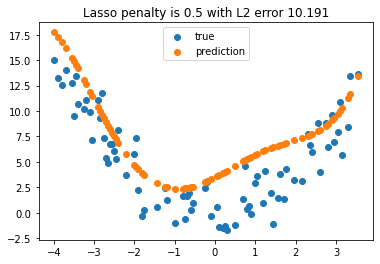

 ########### 
Lasso penalty is 0.55
Optimization terminated successfully.
         Current function value: 610.790648
         Iterations: 446
         Function evaluations: 722
[ 2.607  1.96   0.454 -0.421  0.032  0.02 ]


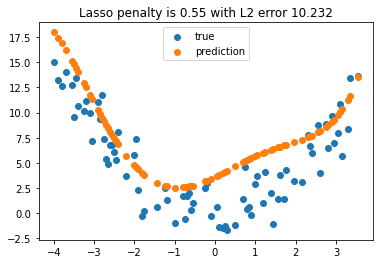

 ########### 
Lasso penalty is 0.6000000000000001
Optimization terminated successfully.
         Current function value: 613.187930
         Iterations: 478
         Function evaluations: 759
[ 2.615  1.972  0.44  -0.422  0.033  0.02 ]


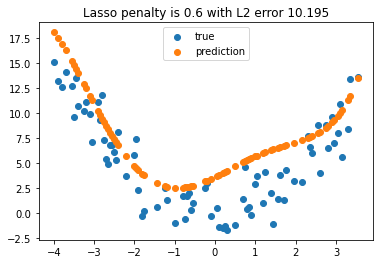

 ########### 
Lasso penalty is 0.65
Optimization terminated successfully.
         Current function value: 567.828977
         Iterations: 728
         Function evaluations: 1161
[ 1.471  2.533  0.851 -0.584  0.008  0.028]


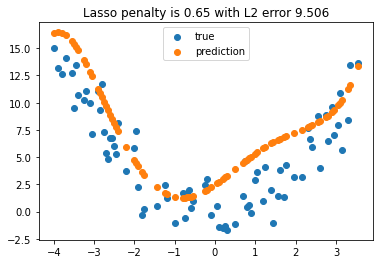

 ########### 
Lasso penalty is 0.7000000000000001
[ 0.14   2.197  1.233 -0.531 -0.013  0.026]


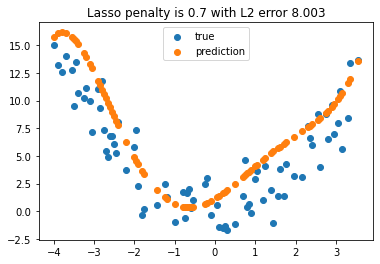

 ########### 
Lasso penalty is 0.75
[ 2.402  2.194  0.508 -0.478  0.029  0.022]


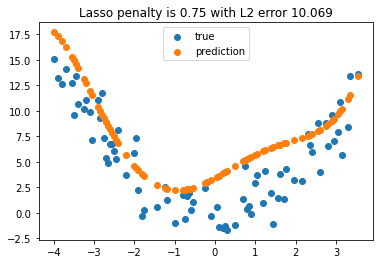

 ########### 
Lasso penalty is 0.8
Optimization terminated successfully.
         Current function value: 610.419721
         Iterations: 422
         Function evaluations: 680
[ 2.354  2.205  0.543 -0.484  0.026  0.023]


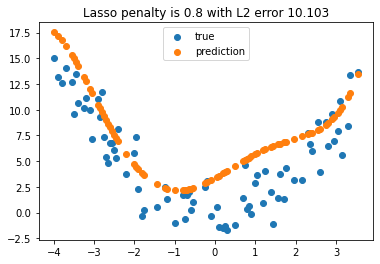

 ########### 
Lasso penalty is 0.8500000000000001
Optimization terminated successfully.
         Current function value: 589.815069
         Iterations: 712
         Function evaluations: 1115
[ 1.71   2.557  0.723 -0.576  0.017  0.028]


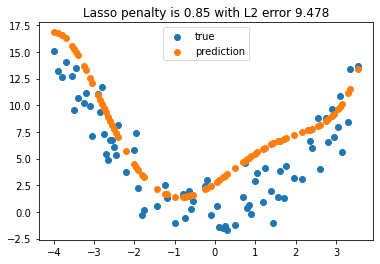

 ########### 
Lasso penalty is 0.9
Optimization terminated successfully.
         Current function value: 605.220714
         Iterations: 675
         Function evaluations: 1076
[ 2.099  2.385  0.618 -0.53   0.022  0.025]


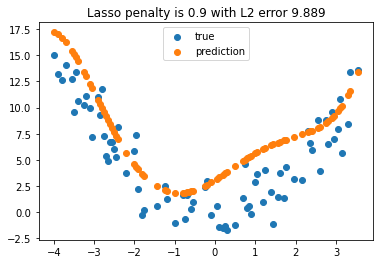

 ########### 
Lasso penalty is 0.9500000000000001
Optimization terminated successfully.
         Current function value: 610.208503
         Iterations: 659
         Function evaluations: 1044
[ 2.226  2.312  0.575 -0.51   0.025  0.024]


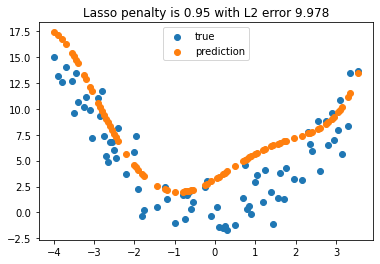

 ########### 
Lasso penalty is 1.0
Optimization terminated successfully.
         Current function value: 607.352495
         Iterations: 735
         Function evaluations: 1150
[ 2.248  2.254  0.596 -0.5    0.023  0.024]


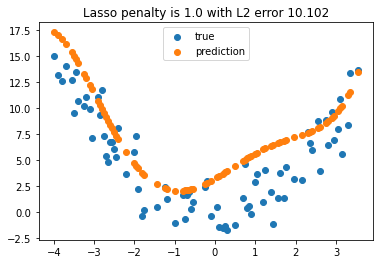

 ########### 
Lasso penalty is 1.05
Optimization terminated successfully.
         Current function value: 618.989061
         Iterations: 405
         Function evaluations: 658
[ 2.67   1.912  0.414 -0.405  0.034  0.019]


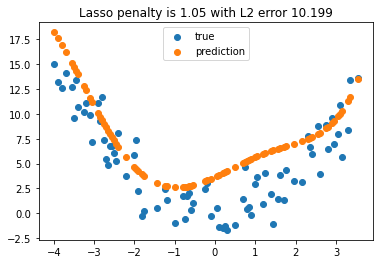

 ########### 
Lasso penalty is 1.1
Optimization terminated successfully.
         Current function value: 614.577783
         Iterations: 441
         Function evaluations: 726
[ 2.371  2.196  0.534 -0.481  0.027  0.023]


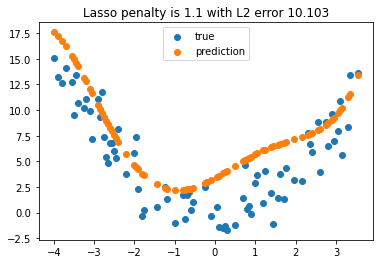

 ########### 
Lasso penalty is 1.1500000000000001
Optimization terminated successfully.
         Current function value: 619.835191
         Iterations: 466
         Function evaluations: 756
[ 2.636  1.951  0.429 -0.415  0.033  0.019]


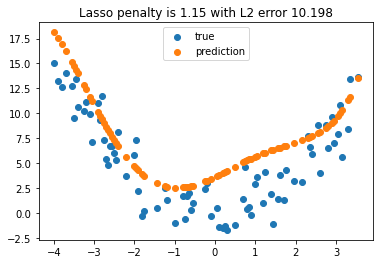

 ########### 
Lasso penalty is 1.2000000000000002
Optimization terminated successfully.
         Current function value: 584.397635
         Iterations: 698
         Function evaluations: 1109
[ 1.608  2.546  0.783 -0.58   0.013  0.028]


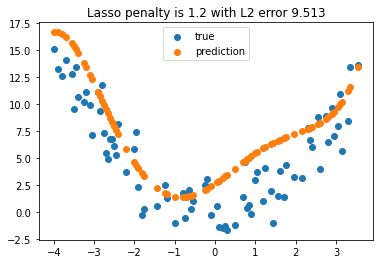

 ########### 
Lasso penalty is 1.25
Optimization terminated successfully.
         Current function value: 609.223901
         Iterations: 729
         Function evaluations: 1131
[ 2.112  2.374  0.616 -0.527  0.022  0.025]


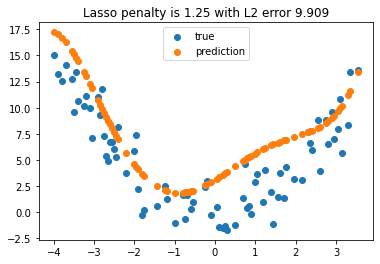

 ########### 
Lasso penalty is 1.3
Optimization terminated successfully.
         Current function value: 615.055072
         Iterations: 435
         Function evaluations: 704
[ 2.432  2.113  0.532 -0.462  0.027  0.022]


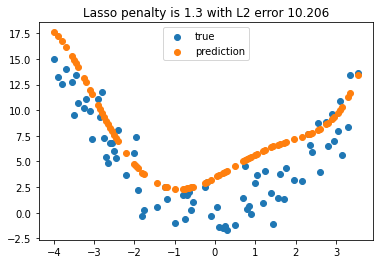

 ########### 
Lasso penalty is 1.35
Optimization terminated successfully.
         Current function value: 575.501881
         Iterations: 733
         Function evaluations: 1155
[ 1.412  2.584  0.834 -0.591  0.01   0.029]


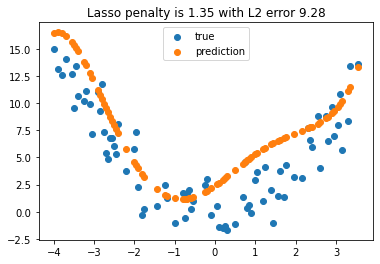

 ########### 
Lasso penalty is 1.4000000000000001
Optimization terminated successfully.
         Current function value: 617.855583
         Iterations: 440
         Function evaluations: 709
[ 2.575  1.97   0.481 -0.425  0.03   0.02 ]


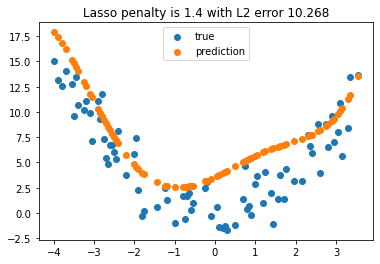

 ########### 
Lasso penalty is 1.4500000000000002
Optimization terminated successfully.
         Current function value: 622.310698
         Iterations: 425
         Function evaluations: 680
[ 2.638  1.938  0.434 -0.412  0.033  0.019]


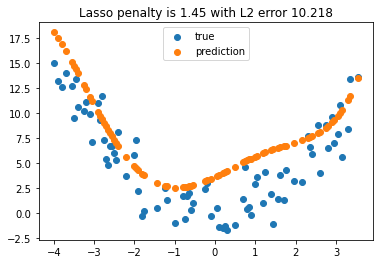

 ########### 
Lasso penalty is 1.5
Optimization terminated successfully.
         Current function value: 623.421208
         Iterations: 425
         Function evaluations: 686
[ 2.647  1.934  0.428 -0.41   0.033  0.019]


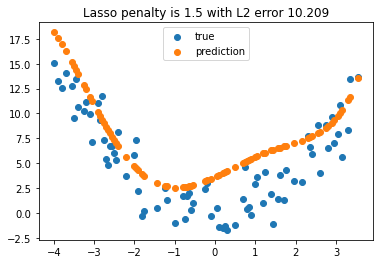

 ########### 
Lasso penalty is 1.55
Optimization terminated successfully.
         Current function value: 597.565070
         Iterations: 679
         Function evaluations: 1076
[ 1.829  2.469  0.727 -0.558  0.016  0.027]


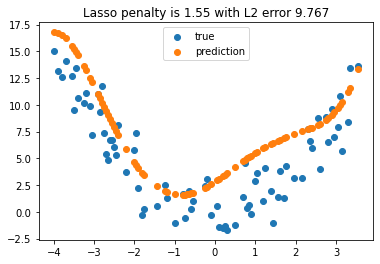

 ########### 
Lasso penalty is 1.6
Optimization terminated successfully.
         Current function value: 621.353579
         Iterations: 448
         Function evaluations: 724
[ 2.575  1.984  0.473 -0.427  0.03   0.02 ]


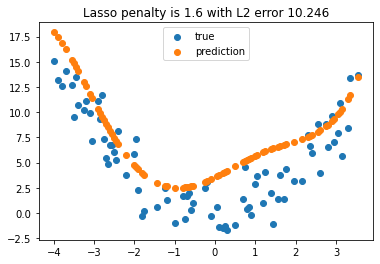

 ########### 
Lasso penalty is 1.6500000000000001
[ 0.691 -1.064  0.846  0.26   0.014 -0.014]


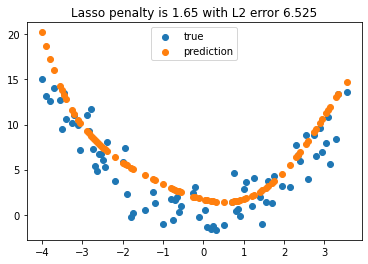

 ########### 
Lasso penalty is 1.7000000000000002
Optimization terminated successfully.
         Current function value: 340.078508
         Iterations: 699
         Function evaluations: 1121
[-0.666  0.854  1.391 -0.228 -0.02   0.012]


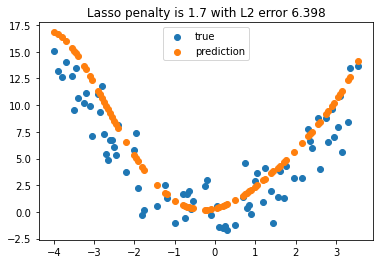

 ########### 
Lasso penalty is 1.75
[ 1.786  2.493  0.733 -0.563  0.015  0.027]


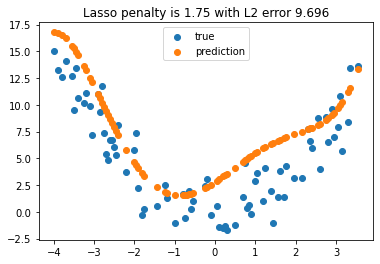

 ########### 
Lasso penalty is 1.8
Optimization terminated successfully.
         Current function value: 621.368824
         Iterations: 449
         Function evaluations: 724
[ 2.525  2.017  0.502 -0.437  0.028  0.02 ]


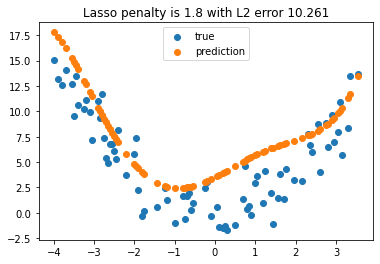

 ########### 
Lasso penalty is 1.85
Optimization terminated successfully.
         Current function value: 611.576675
         Iterations: 667
         Function evaluations: 1065
[ 2.036  2.401  0.649 -0.536  0.02   0.026]


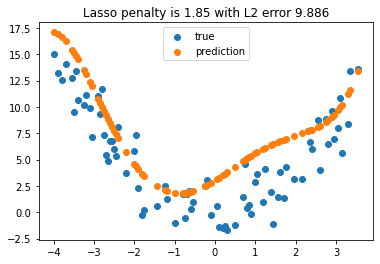

 ########### 
Lasso penalty is 1.9000000000000001
[ 0.597  2.461  1.078 -0.58  -0.004  0.029]


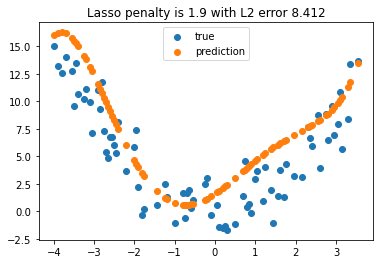

 ########### 
Lasso penalty is 1.9500000000000002
Optimization terminated successfully.
         Current function value: 619.016657
         Iterations: 429
         Function evaluations: 703
[ 2.414  2.095  0.556 -0.46   0.025  0.022]


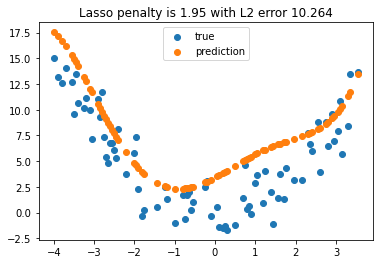

 ########### 
Lasso penalty is 2.0
Optimization terminated successfully.
         Current function value: 628.959908
         Iterations: 435
         Function evaluations: 704
[ 2.679  1.893  0.415 -0.399  0.034  0.018]


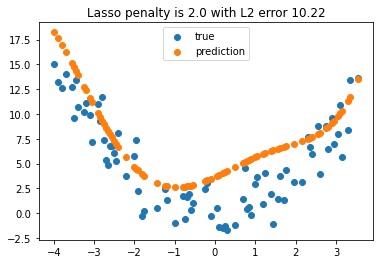

 ########### 


In [20]:
Lambdas = np.arange(0,2.01,0.05)
Errors = list()

for l in Lambdas:
    Reg = PolyReg(5,x =X_train, y = y_train,
             Lambda = l)
    print("Lasso penalty is",Reg.Lambda)
    
    Reg.fit()
    yhat = Reg.predict(X_test)
    print(np.round(Reg.coeffs,3))
    plt.scatter(X_test, y_test, label="true")
    plt.scatter(X_test, yhat, label="prediction")
    plt.legend(loc="upper center")
    plt.title("Lasso penalty is "+str(np.round(l,2))+" with L2 error "+ str(np.round(np.mean((yhat-y_test)**2.),3)))
    plt.show()
    
    Errors += [np.mean((yhat-y_test)**2.)]
    print(" ########### ")

## Evaluate the Effect of the Hyperparameter Lambda

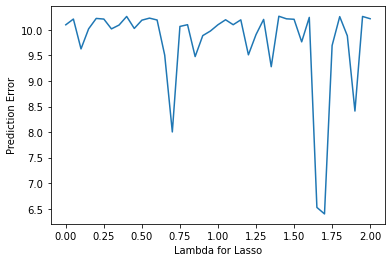

In [21]:
plt.plot(Lambdas, Errors)
plt.xlabel("Lambda for Lasso")
plt.ylabel("Prediction Error")
plt.show()